In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from IPython.display import display, Math

### General Linear Model
### $\mathbf{y} = X\beta$

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
coloumns = "bedrooms,bathrooms,sqft_living,sqft_lot".split(",")
X = df[coloumns].values
y = df["price"]

### We estimate $\beta$ by minimizing RSS (Residual Sum of Squares)
### $RSS(\beta) = (\mathbf{y} - X\beta)^T(\mathbf{y} - X\beta)$
### $\hat{\beta} = (X^TX)^{-1}X^T\mathbf{y}$

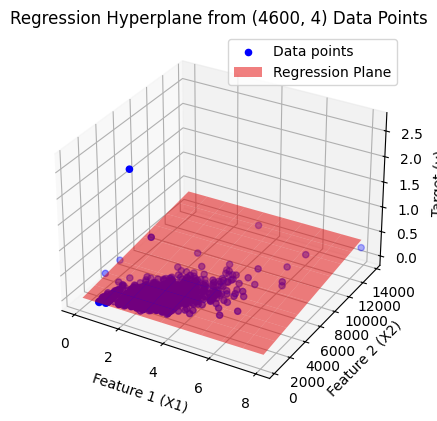

In [5]:
b_hat = inv(X.T @ X) @ X.T @ y
y_hat = X @ b_hat


# Now, we need to create a grid of values for X1 and X2 and predict the corresponding Y values
x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x2_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 10)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Use the regression model to calculate y values (i.e., the plane)
y_plane = b_hat[0] + b_hat[1] * x1 + b_hat[2] * x2

# Plotting the 3D data and the regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points (we are using X1, X2, y for 3D visualization)
ax.scatter(X[:, 1], X[:, 2], y, color='blue', s=20, label="Data points")

# Plot the regression plane
ax.plot_surface(x1, x2, y_plane, color='red', alpha=0.5, label="Regression Plane")

# Labels and title
ax.set_xlabel('Feature 1 (X1)')
ax.set_ylabel('Feature 2 (X2)')
ax.set_zlabel('Target (y)')
ax.set_title('Regression Hyperplane from (4600, 4) Data Points')

plt.legend()
plt.show()

In [7]:
print("y_hat = ", y_hat)

y_hat =  [322625.54238158 927712.35615118 495005.45354197 ... 807401.16943051
 515734.90128344 391226.95252377]
